In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random


2022-03-03 14:13:37.315713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 14:13:37.315745: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data'

In [4]:
number = 10
str(number).zfill(4)

'0010'

In [5]:
def get_dataset(path, sample_size=500, image_size=(64,64), random_seed=1):
    """
    get a dataset of images of required size, randomly selected
    returns X (masked images), y (unmasked images of the same faces), and a sample test set of 5 images
    path to data : ..../raw_data
    the function then completes the path by adding : 64x64/Mask or No_mask (or 256x256/Mask etc.)
    """
    path = f'{path}/{image_size[0]}x{image_size[1]}/'
    print(f'Loading data from {path}...')
    random.seed(random_seed)
    data_size = sample_size
    X = []
    y = []
    X_test = []
    for number in range(data_size):
        rand_img_nb = random.randint(0,9999)
        no_mask_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X.append(mask_im)
        y.append(no_mask_im)
    for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_test.append(mask_im)
    X=np.asarray(X)
    y=np.asarray(y)
    X_test=np.asarray(X_test)
    print('Done')
    print(f'X shape : {X.shape}')
    print(f'y shape : {y.shape}')
    print(f'X_test shape : {X_test.shape}')
    return X, y, X_test

In [6]:
X, y, X_test = get_dataset(path, sample_size= 500, image_size=(64,64), random_seed=5)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape : (500, 64, 64, 3)
y shape : (500, 64, 64, 3)
X_test shape : (5, 64, 64, 3)


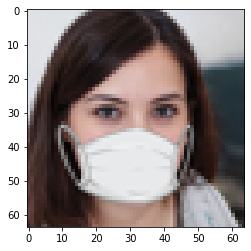

In [7]:
plt.imshow(X_test[0])

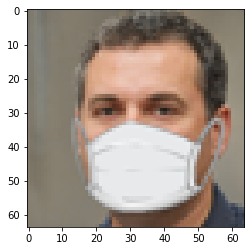

In [8]:
plt.imshow(X[20])

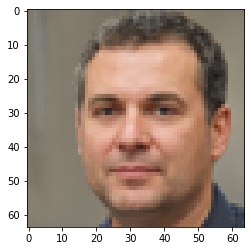

In [9]:
plt.imshow(y[20])

In [10]:
from icangetyoursmile.models import unet

In [23]:
model = unet(input_size=(64,64,3))

In [24]:
from icangetyoursmile.custom_callbacks import CustomCallback
image_log = dict()
save_predict = CustomCallback(X_test, image_log)

In [59]:
results = model.fit(X, y, batch_size=8, epochs=50, use_multiprocessing=True, callbacks=save_predict)

Epoch 1/50
63/63 [==============================] - 4s 59ms/step - loss: 80.9740
Epoch 2/50
63/63 [==============================] - 4s 56ms/step - loss: 80.3102
Epoch 3/50
63/63 [==============================] - 4s 56ms/step - loss: 80.1556
Epoch 4/50
63/63 [==============================] - 4s 56ms/step - loss: 79.1246
Epoch 5/50
63/63 [==============================] - 3s 55ms/step - loss: 78.6235
Epoch 6/50
63/63 [==============================] - 4s 59ms/step - loss: 78.7685
Epoch 7/50
63/63 [==============================] - 4s 57ms/step - loss: 78.6464
Epoch 8/50
63/63 [==============================] - 4s 56ms/step - loss: 78.4726
Epoch 9/50
63/63 [==============================] - 4s 57ms/step - loss: 78.1692
Epoch 10/50
63/63 [==============================] - 4s 58ms/step - loss: 77.7089
Epoch 11/50
63/63 [==============================] - 4s 58ms/step - loss: 77.3773
Epoch 12/50
63/63 [==============================] - 4s 57ms/step - loss: 77.0750
Epoch 13/50
63/63 [======

In [60]:
y_pred = model.predict(X_test).astype(np.uint8)

In [61]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

In [62]:
import pickle

In [63]:
with open('image_log.pickle', 'wb') as handle:
    pickle.dump(image_log, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [64]:
with open('image_log.pickle', 'rb') as handle:
    image_log2 = pickle.load(handle)

<IPython.core.display.Javascript object>


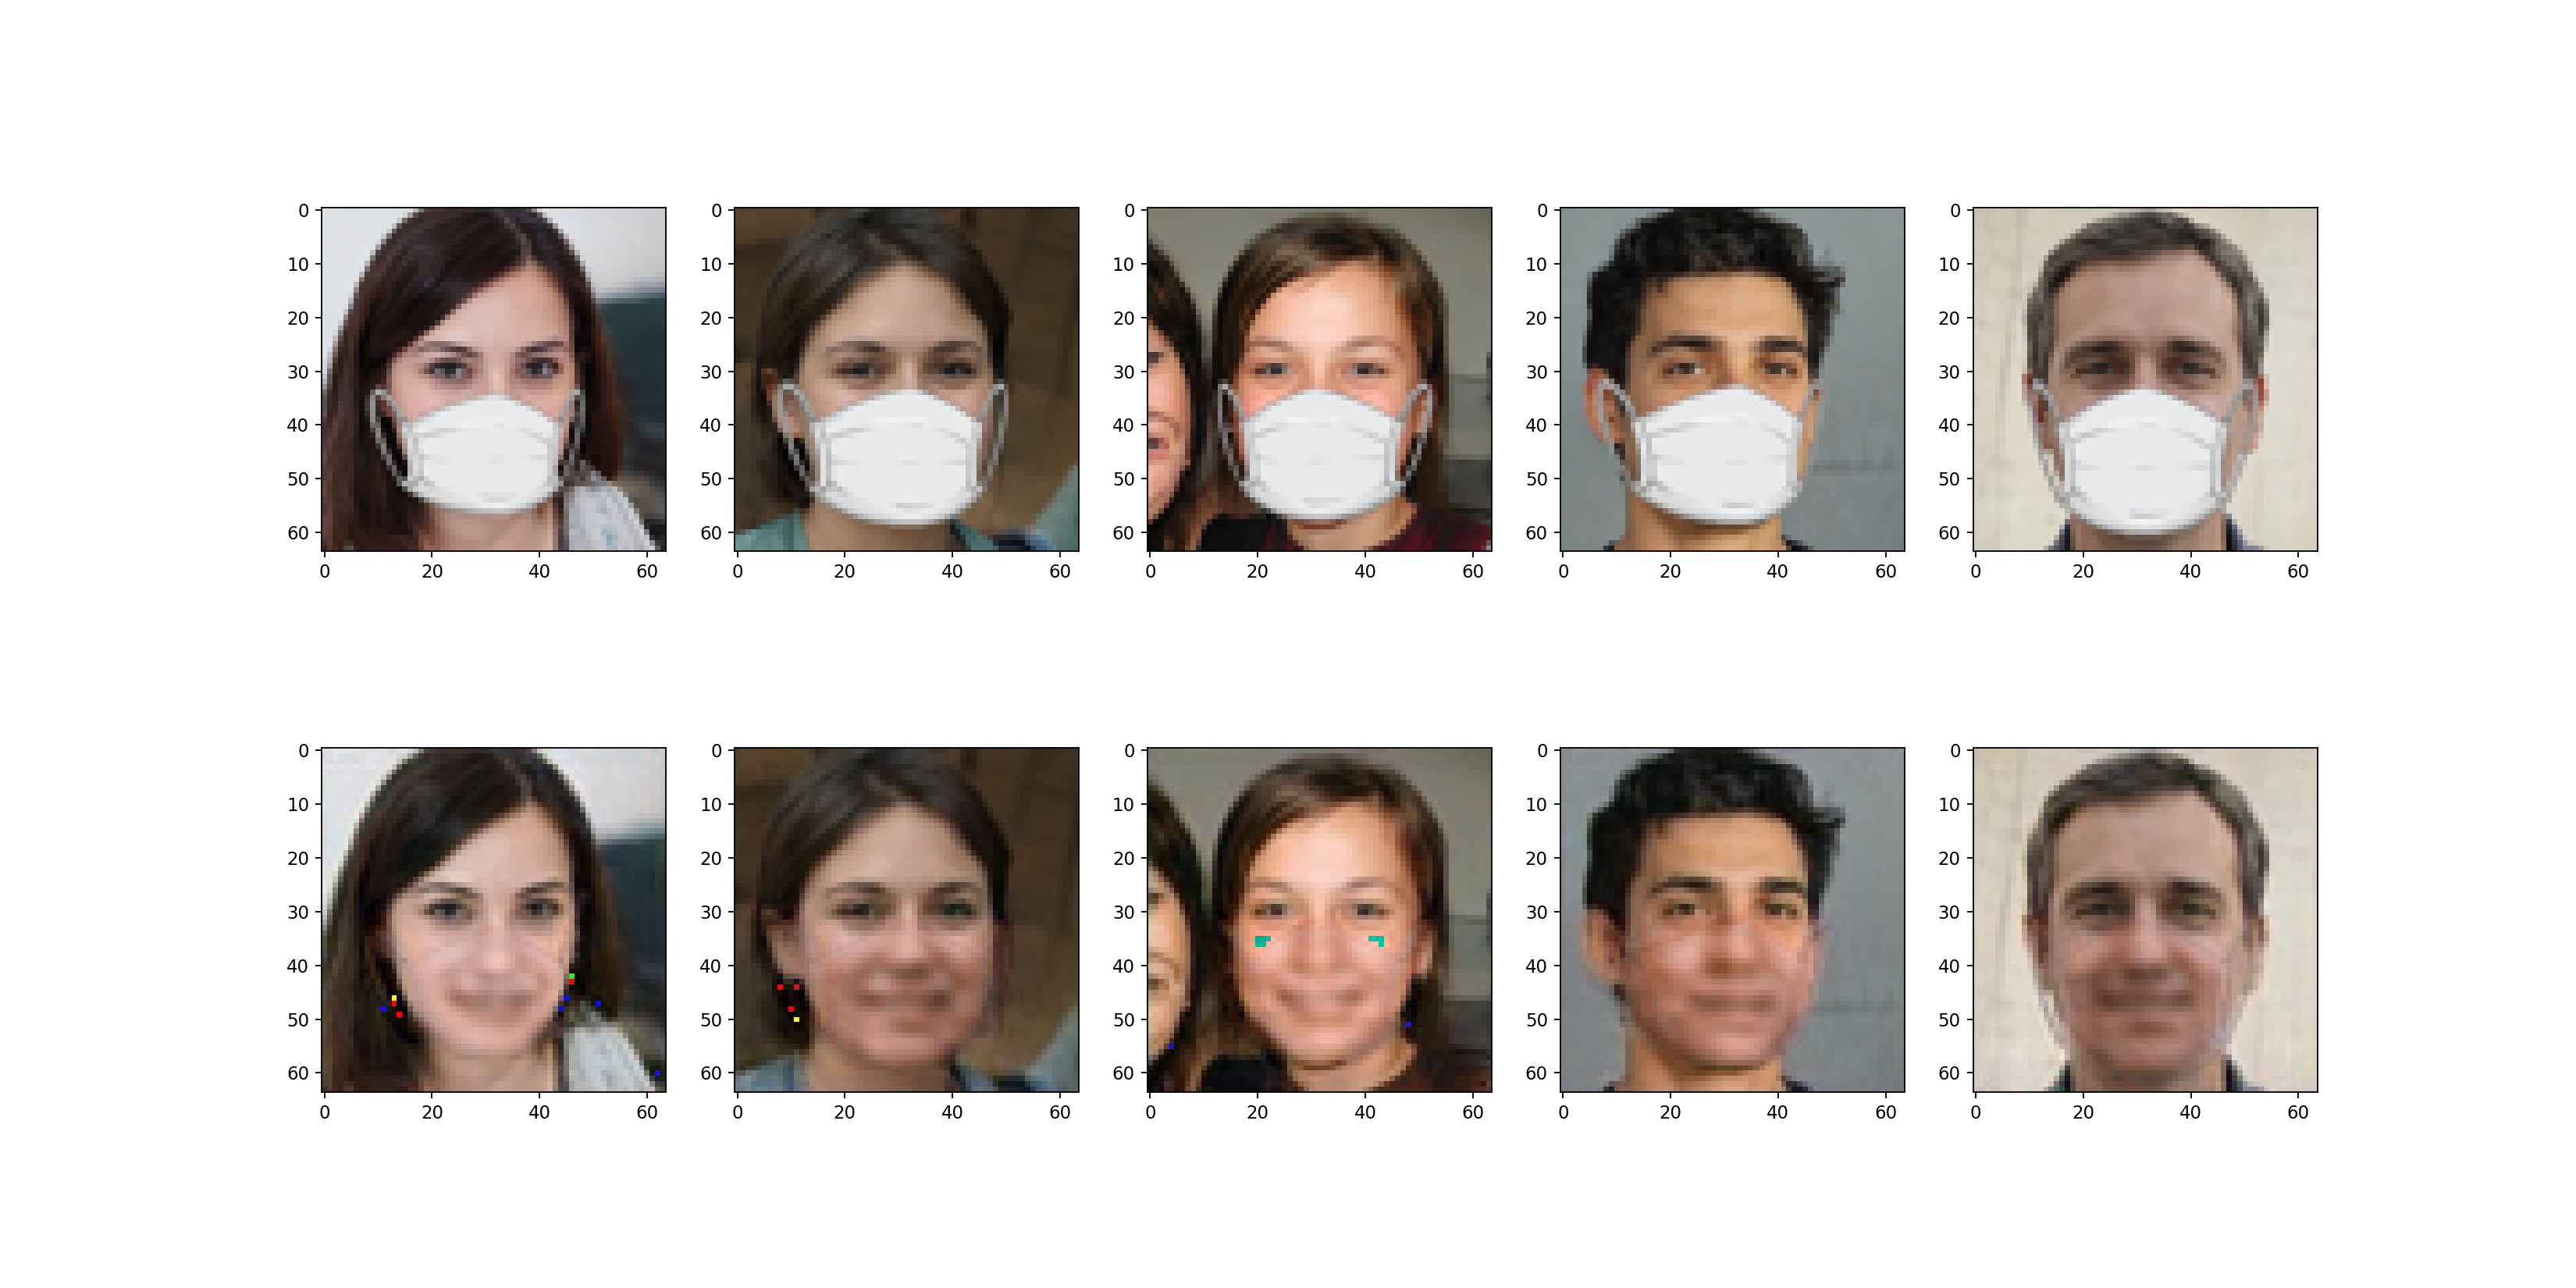

In [65]:
plot_results(X_test, y_pred);

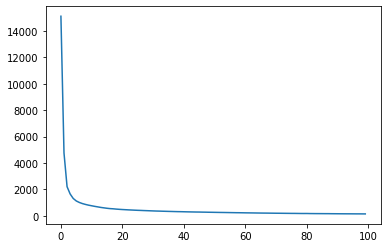

In [33]:
plt.plot(results.history['loss'])

/tmp/ipykernel_921/4029249524.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


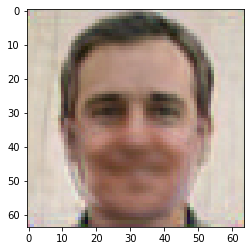

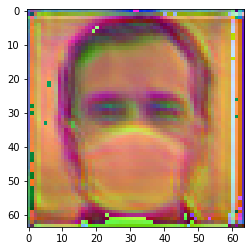

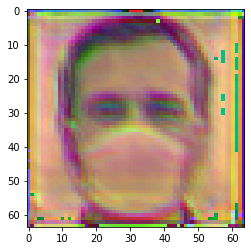

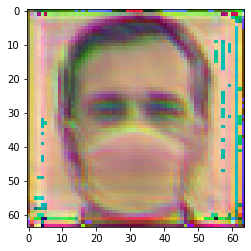

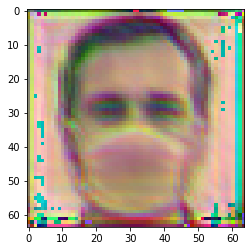

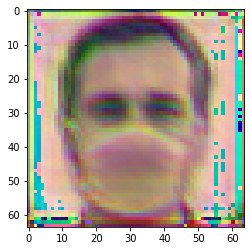

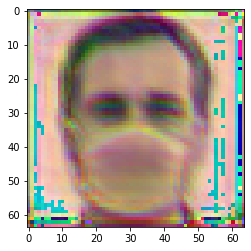

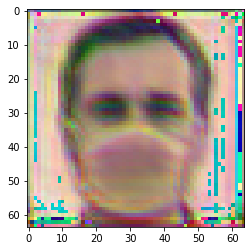

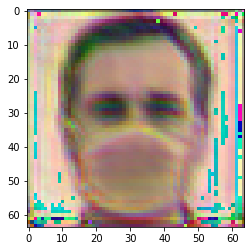

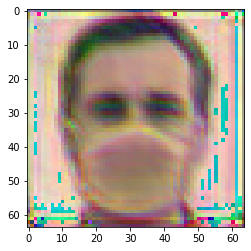

In [35]:
image_nb=4
fig = plt.gcf()
fig.show()
fig.canvas.draw()
for i in range(int(len(image_log)/10)):
    plt.imshow(image_log[i][image_nb])
    plt.pause(0.05)
    fig.canvas.draw()
    

In [36]:
im_size = (64,64)

In [37]:
input_size = (im_size[0], im_size[1],3)
input_size

(64, 64, 3)

<IPython.core.display.Javascript object>


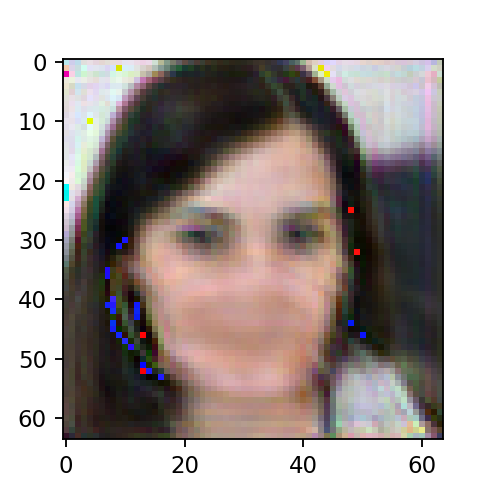

In [44]:
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure(figsize=(3,3),frameon=False)
image_nb = 0
frames = []
for i in range(len(image_log)):
    frames.append([plt.imshow(image_log[i][image_nb],animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)
plt.show()

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
